# COMP4220: Machine Learning, Spring 2022, Assignment 3


> ## **Please submit one pdf file for all questions.**


In [190]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [191]:
df = pd.read_csv("wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## variables (based on physicochemical tests):
<ol>
 <li>fixed acidity</li>
 <li>volatile acidity</li>
 <li>citric acid</li>
 <li>residual sugar</li>
 <li>chlorides</li>
 <li>free sulfur dioxide</li>
 <li>total sulfur dioxide</li>
 <li>density</li>
 <li>pH</li>
 <li>sulphates</li>
 <li>alcohol</li>
 <li>quality (score between 0 and 10)</li>
</ol>

## Tips
> An interesting thing to do is to set an arbitrary cutoff for your dependent variable (wine quality): 7 or higher getting classified as '1' and the remainder as '0'.
>### This allows you to convert this problem into a classification problem. 

## 1. Since we want to classify the wine base on the quality so we want to look at the distribution of the wine quality
## Make a histogram plot for the quality column to see the distribution of the wine quality

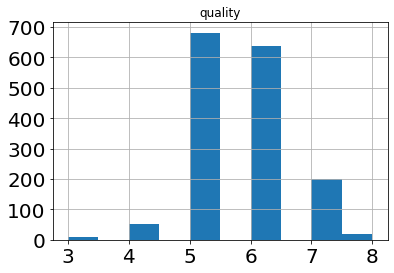

In [192]:
plot = df.hist(column='quality',xlabelsize=20, ylabelsize=20,bins=10)

## 2. Show the number of null values using sum() method. If there are null values then remove them from the dataset

In [193]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## 3. Since we want to categorize the dependent variable (wine quality)
## Change the quality column to 1 if the quality >= 7, and 0 if the quality is < 7
## Show the dataset after making this change
## Hint: the quality column should only have 0s and 1s after the change

In [194]:
#df.loc[df['quality'] < 7, 'quality'] = 0
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


## 4. Create y as the quality column and X as everything but the quality column

In [195]:
X = df.drop(['quality'], axis=1).to_numpy() # Drop quality column and make rest numpy array
y = df['quality'].to_numpy() # The labels for machine learning.
X.shape, y.shape

((1599, 11), (1599,))

## 5. Split the dataset into the training and test set using "train_test_split".
## Split the training and test set into 70-30 ratio

In [196]:
from sklearn.model_selection import train_test_split, KFold  
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression

In [197]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

## 6. Apply Feature Scaling method for X_train and X_test with "StandardScaler" from "sklearn.preprocessing"
## Hint: use StandardScaler.fit_transform for "X_train" and use StandardScaler.transform for "X_test"

In [198]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

#pipe = Pipeline([
#                 ('scaler', StandardScaler()),
#                 ('regressor', LogisticRegression())
#])
#pipe.fit(X_train, y_train)

array([[-0.29462956,  0.35128877, -0.47837618, ...,  0.76163337,
        -0.3845304 , -0.40133102],
       [-1.28909349, -1.73354099,  0.64880941, ..., -0.40750432,
        -0.3845304 ,  1.34056514],
       [-0.9966041 , -0.1424867 , -1.19567611, ...,  0.50182499,
        -0.08312643, -0.95140348],
       ...,
       [ 0.17335347,  1.09195198, -0.17096193, ...,  0.04716034,
         2.50894779, -1.04308223],
       [ 0.23185135, -1.18490158,  0.95622367, ...,  0.30696871,
         0.64024312, -0.30965227],
       [-0.29462956,  0.29642483, -0.73455473, ..., -0.47245641,
        -0.74621518,  0.69881392]])

## 7. Train the logistic regression model on the training set using (solver='lbfgs', random_state = 42, max_iter = 1000)

In [199]:
log_reg = LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## 8.Predict the results of x_test

In [200]:
y_pred = log_reg.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 

## 9.Make the confusion matrix and show the result


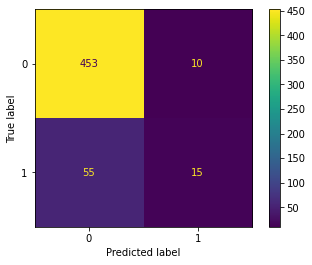

In [201]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

## 10. find the precision_score, recall_score, and f1_score and print them

In [202]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
print(classification_report(y_test, y_pred))
#precision_score(y_test, y_pred)
#recall_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       463
           1       0.60      0.21      0.32        70

    accuracy                           0.88       533
   macro avg       0.75      0.60      0.62       533
weighted avg       0.85      0.88      0.85       533



## 11. Use the precision_recall_curve() function to compute precision and recall for all possible thresholds
 

In [203]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

## 12. Use Matplotlib to plot precision and recall as functions of the threshold value

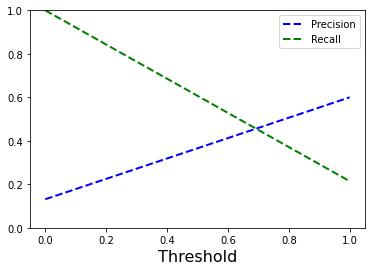

In [204]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall', linewidth=2)
    plt.xlabel('Threshold', fontsize=16)
    plt.legend(loc="upper right", fontsize=10)
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## 13. Plot the precision vs recall plot


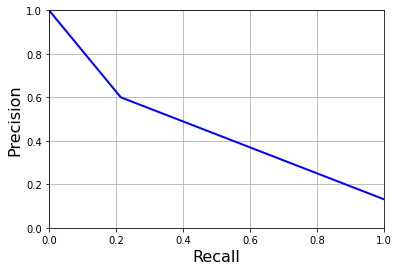

In [205]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plot_precision_vs_recall(precisions, recalls)
plt.show()

## 14. Plot the ROC Curve

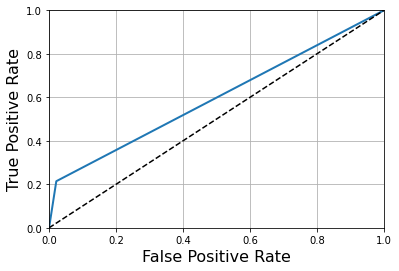

In [206]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.grid(True)

plot_roc_curve(fpr, tpr, label=None)
plt.show()


## 15. Find the area under the ROC Curve

In [208]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.5963437210737427
